<div style="text-align: center;"><div  style="color:#03bafc; font-size:30px; font-weight:bold; line-height:40px;">Employee Data Analysis</div></div>
<div style="text-align: center; color:#006666"><strong>Created By: </strong>Parikshit Koya</div>
<br>
<div style="text-align: center; color:#006666"><strong>Linkedin: </strong><a href='https://www.linkedin.com/in/parikshitkoya'>https://www.linkedin.com/in/parikshitkoya</a></div>
<div style="text-align: center; color:#006666"><strong>GitHub: </strong><a href='https://github.com/parikshitkoya'>https://github.com/parikshitkoya</a></div>

### Task 1:

Using the provided data sets, surface insights about employee attrition that will inform the organization’s efforts to retain top talent.

**Your presentation should broadly cover the following areas:**

- Your approach to the analysis (including any tools/technology used)
- Findings/insights
- Recommendations
- Any other observations you have from the data

Analysis perspective:

- Promotions, Mobility, growth and stagnation
- Turn over
- E-Sat Score
- Diverisity
- Overtime & Travel and its relation to work-life balance
- Stability and any concerns from frequent job changes
- Fairness of compensation
- Pay-parity based on tenure and/or performance in any given role

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
attrition = pd.read_csv(r'Data\Attrition_Data.csv')
benefits = pd.read_csv(r'Data\Benefits_Data.csv')
demographics = pd.read_csv(r'Data\Demographic_Data.csv')
job = pd.read_csv(r'Data\Job_Data.csv')
payroll = pd.read_csv(r'Data\Payroll_Data.csv')
performance = pd.read_csv(r'Data\Performance_Data.csv')
prioremp = pd.read_csv(r'Data\Prior_Employment_Data.csv')
survey = pd.read_csv(r'Data\Survey_Data.csv')
tenure = pd.read_csv(r'Data\Tenure_Data.csv')

In [3]:
attrition

,EmployeeID,AttritionFlag
0,10001,1
1,10002,0
2,10003,1
3,10004,0
4,10005,0
...,...,...
1465,11466,0
1466,11467,0
1467,11468,0
1468,11469,0


In [4]:
benefits

,EmployeeID,StockOptionLevel,TrainingTimesLastYear
0,10001,0,0
1,10002,1,3
2,10003,0,3
3,10004,0,3
4,10005,1,3
...,...,...,...
1466,11467,1,5
1467,11468,1,0
1468,11469,0,3
1469,11470,0,3


In [5]:
demographics

,EmployeeID,Age,CommuteDistance,Education,EducationField,Gender,MaritalStatus,Over18
0,10001,41,1,2,Life Sciences,Female,Single,Y
1,10002,49,8,1,Life Sciences,Male,Married,Y
2,10003,37,2,2,Other,Male,Single,Y
3,10004,33,3,4,Life Sciences,Female,Married,Y
4,10005,27,2,1,Medical,Male,Married,Y
...,...,...,...,...,...,...,...,...
1465,11466,36,23,2,Medical,Male,Married,Y
1466,11467,39,6,1,Medical,Male,Married,Y
1467,11468,27,4,3,Life Sciences,Male,Married,Y
1468,11469,49,2,3,Medical,Male,Married,Y


In [6]:
job

,EmployeeID,Department,JobInvolvement,JobLevel,JobRole,OverTime,BusinessTravel
0,10001,Sales,3,2,Sales Executive,Yes,Travel_Rarely
1,10002,Research & Development,2,2,Research Scientist,No,Travel_Frequently
2,10003,Research & Development,2,1,Laboratory Technician,Yes,Travel_Rarely
3,10004,Research & Development,3,1,Research Scientist,Yes,Travel_Frequently
4,10005,Research & Development,3,1,Laboratory Technician,No,Travel_Rarely
...,...,...,...,...,...,...,...
1465,11466,Research & Development,4,2,Laboratory Technician,No,Travel_Frequently
1466,11467,Research & Development,2,3,Healthcare Representative,No,Travel_Rarely
1467,11468,Research & Development,4,2,Manufacturing Director,Yes,Travel_Rarely
1468,11469,Sales,2,2,Sales Executive,No,Travel_Frequently


In [7]:
job.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
payroll

,EmployeeID,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,StandardHours
0,10001,1102,94,5993,19479,80
1,10002,279,61,5130,24907,80
2,10003,1373,92,2090,2396,80
3,10004,1392,56,2909,23159,80
4,10005,591,40,3468,16632,80
...,...,...,...,...,...,...
1465,11466,884,41,2571,12290,80
1466,11467,613,42,9991,21457,80
1467,11468,155,87,6142,5174,80
1468,11469,1023,63,5390,13243,80


In [9]:
performance

,EmployeeID,PercentSalaryHike,PerformanceRating
0,10001,11,3
1,10002,23,4
2,10003,15,3
3,10004,11,3
4,10005,12,3
...,...,...,...
1465,11466,17,3
1466,11467,15,3
1467,11468,20,4
1468,11469,14,3


In [10]:
prioremp

,EmployeeID,NumCompaniesWorked
0,10001,8
1,10002,1
2,10003,6
3,10004,1
4,10005,9
...,...,...
1465,11466,4
1466,11467,4
1467,11468,1
1468,11469,2


In [11]:
survey

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
0,10001,2,4,1,4
1,10002,3,2,4,3
2,10003,4,3,2,3
3,10004,4,3,3,3
4,10005,1,2,4,3
...,...,...,...,...,...
1465,11466,3,4,3,3
1466,11467,4,1,1,3
1467,11468,2,2,2,3
1468,11469,4,2,4,3


In [12]:
tenure

,EmployeeID,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10001,8,6,4,0,5
1,10002,10,10,7,1,7
2,10003,7,0,0,0,0
3,10004,8,8,7,3,0
4,10005,6,2,2,2,2
...,...,...,...,...,...,...
1465,11466,17,5,2,0,3
1466,11467,9,7,7,1,7
1467,11468,6,6,2,0,3
1468,11469,17,9,6,0,8


In [13]:
tenure.corr()

,EmployeeID,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,1.000000,-0.014095,-0.016659,-0.008853,-0.009151,-0.009432
TotalWorkingYears,-0.014095,1.000000,0.623875,0.460365,0.404858,0.459188
YearsAtCompany,-0.016659,0.623875,1.000000,0.742886,0.614183,0.749195
YearsInCurrentRole,-0.008853,0.460365,0.742886,1.000000,0.548056,0.714365
YearsSinceLastPromotion,-0.009151,0.404858,0.614183,0.548056,1.000000,0.510224
YearsWithCurrManager,-0.009432,0.459188,0.749195,0.714365,0.510224,1.000000


In [14]:
tenure2 = tenure

In [15]:
tenure2.set_index('EmployeeID')
tenure2

,EmployeeID,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10001,8,6,4,0,5
1,10002,10,10,7,1,7
2,10003,7,0,0,0,0
3,10004,8,8,7,3,0
4,10005,6,2,2,2,2
...,...,...,...,...,...,...
1465,11466,17,5,2,0,3
1466,11467,9,7,7,1,7
1467,11468,6,6,2,0,3
1468,11469,17,9,6,0,8


In [16]:
from functools import reduce
dfs = [attrition, benefits, demographics, job, payroll, performance, prioremp, survey, tenure]
df = reduce(lambda left, right: pd.merge(left, right, how="outer", on=['EmployeeID']), dfs)
df

,EmployeeID,AttritionFlag,StockOptionLevel,TrainingTimesLastYear,Age,CommuteDistance,Education,EducationField,Gender,MaritalStatus,...,NumCompaniesWorked,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10001,1.0,0,0,41.0,1.0,2.0,Life Sciences,Female,Single,...,8.0,2.0,4.0,1.0,4.0,8.0,6.0,4.0,0.0,5.0
1,10002,0.0,1,3,49.0,8.0,1.0,Life Sciences,Male,Married,...,1.0,3.0,2.0,4.0,3.0,10.0,10.0,7.0,1.0,7.0
2,10003,1.0,0,3,37.0,2.0,2.0,Other,Male,Single,...,6.0,4.0,3.0,2.0,3.0,7.0,0.0,0.0,0.0,0.0
3,10004,0.0,0,3,33.0,3.0,4.0,Life Sciences,Female,Married,...,1.0,4.0,3.0,3.0,3.0,8.0,8.0,7.0,3.0,0.0
4,10005,0.0,1,3,27.0,2.0,1.0,Medical,Male,Married,...,9.0,1.0,2.0,4.0,3.0,6.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,11467,0.0,1,5,39.0,6.0,1.0,Medical,Male,Married,...,4.0,4.0,1.0,1.0,3.0,9.0,7.0,7.0,1.0,7.0
1467,11468,0.0,1,0,27.0,4.0,3.0,Life Sciences,Male,Married,...,1.0,2.0,2.0,2.0,3.0,6.0,6.0,2.0,0.0,3.0
1468,11469,0.0,0,3,49.0,2.0,3.0,Medical,Male,Married,...,2.0,4.0,2.0,4.0,3.0,17.0,9.0,6.0,0.0,8.0
1469,11470,0.0,0,3,34.0,8.0,3.0,Medical,Male,Married,...,2.0,2.0,3.0,1.0,4.0,6.0,4.0,3.0,1.0,2.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 0 to 1470
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1471 non-null   int64  
 1   AttritionFlag             1470 non-null   float64
 2   StockOptionLevel          1471 non-null   int64  
 3   TrainingTimesLastYear     1471 non-null   int64  
 4   Age                       1470 non-null   float64
 5   CommuteDistance           1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   Gender                    1470 non-null   object 
 9   MaritalStatus             1470 non-null   object 
 10  Over18                    1470 non-null   object 
 11  Department                1470 non-null   object 
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

In [18]:
df.loc[1470]

EmployeeID                  11471
AttritionFlag                 NaN
StockOptionLevel                3
TrainingTimesLastYear           6
Age                           NaN
CommuteDistance               NaN
Education                     NaN
EducationField                NaN
Gender                        NaN
MaritalStatus                 NaN
Over18                        NaN
Department                    NaN
JobInvolvement                NaN
JobLevel                      NaN
JobRole                       NaN
OverTime                      NaN
BusinessTravel                NaN
DailyRate                     NaN
HourlyRate                    NaN
MonthlyIncome                 NaN
MonthlyRate                   NaN
StandardHours                 NaN
PercentSalaryHike             NaN
PerformanceRating             NaN
NumCompaniesWorked            NaN
EnvironmentSatisfaction       NaN
JobSatisfaction               NaN
RelationshipSatisfaction      NaN
WorkLifeBalance               NaN
TotalWorkingYe

In [19]:
df = df.drop(1470)
df

,EmployeeID,AttritionFlag,StockOptionLevel,TrainingTimesLastYear,Age,CommuteDistance,Education,EducationField,Gender,MaritalStatus,...,NumCompaniesWorked,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10001,1.0,0,0,41.0,1.0,2.0,Life Sciences,Female,Single,...,8.0,2.0,4.0,1.0,4.0,8.0,6.0,4.0,0.0,5.0
1,10002,0.0,1,3,49.0,8.0,1.0,Life Sciences,Male,Married,...,1.0,3.0,2.0,4.0,3.0,10.0,10.0,7.0,1.0,7.0
2,10003,1.0,0,3,37.0,2.0,2.0,Other,Male,Single,...,6.0,4.0,3.0,2.0,3.0,7.0,0.0,0.0,0.0,0.0
3,10004,0.0,0,3,33.0,3.0,4.0,Life Sciences,Female,Married,...,1.0,4.0,3.0,3.0,3.0,8.0,8.0,7.0,3.0,0.0
4,10005,0.0,1,3,27.0,2.0,1.0,Medical,Male,Married,...,9.0,1.0,2.0,4.0,3.0,6.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,11466,0.0,1,3,36.0,23.0,2.0,Medical,Male,Married,...,4.0,3.0,4.0,3.0,3.0,17.0,5.0,2.0,0.0,3.0
1466,11467,0.0,1,5,39.0,6.0,1.0,Medical,Male,Married,...,4.0,4.0,1.0,1.0,3.0,9.0,7.0,7.0,1.0,7.0
1467,11468,0.0,1,0,27.0,4.0,3.0,Life Sciences,Male,Married,...,1.0,2.0,2.0,2.0,3.0,6.0,6.0,2.0,0.0,3.0
1468,11469,0.0,0,3,49.0,2.0,3.0,Medical,Male,Married,...,2.0,4.0,2.0,4.0,3.0,17.0,9.0,6.0,0.0,8.0


In [20]:
df['Count'] = 1

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1470 non-null   int64  
 1   AttritionFlag             1470 non-null   float64
 2   StockOptionLevel          1470 non-null   int64  
 3   TrainingTimesLastYear     1470 non-null   int64  
 4   Age                       1470 non-null   float64
 5   CommuteDistance           1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   Gender                    1470 non-null   object 
 9   MaritalStatus             1470 non-null   object 
 10  Over18                    1470 non-null   object 
 11  Department                1470 non-null   object 
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

In [22]:
df.corr()

,EmployeeID,AttritionFlag,StockOptionLevel,TrainingTimesLastYear,Age,CommuteDistance,Education,JobInvolvement,JobLevel,DailyRate,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count
EmployeeID,1.000000,-0.010369,0.062452,0.023907,-0.010349,0.032928,0.041901,-0.007105,-0.018041,-0.051484,...,0.017424,-0.045941,-0.069654,0.013592,-0.014095,-0.016659,-0.008853,-0.009151,-0.009432,NaN
AttritionFlag,-0.010369,1.000000,-0.137145,-0.059478,-0.159205,0.077924,-0.031373,-0.130016,-0.169105,-0.056652,...,-0.103369,-0.103481,-0.045872,0.073115,-0.171063,-0.122785,-0.160545,-0.033019,-0.156199,NaN
StockOptionLevel,0.062452,-0.137145,1.000000,0.011274,0.037510,0.044872,0.018422,0.021523,0.013984,0.042143,...,0.003432,0.010690,-0.045952,-0.041491,0.010136,0.015157,0.050818,0.014352,0.024698,NaN
TrainingTimesLastYear,0.023907,-0.059478,0.011274,1.000000,-0.019621,-0.036942,-0.025100,-0.015338,-0.018191,0.002453,...,-0.019359,-0.005779,0.002497,-0.011911,-0.035662,0.003551,-0.005738,-0.002067,-0.004096,NaN
Age,-0.010349,-0.159205,0.037510,-0.019621,1.000000,-0.001686,0.208034,0.029820,0.509604,0.010661,...,0.010146,-0.004892,0.053535,-0.005150,0.680381,0.311044,0.212901,0.216513,0.202089,NaN
CommuteDistance,0.032928,0.077924,0.044872,-0.036942,-0.001686,1.000000,0.021042,0.008783,0.005303,-0.004985,...,-0.016075,-0.003669,0.006557,-0.028008,0.004628,0.015147,0.018845,0.010029,0.014406,NaN
Education,0.041901,-0.031373,0.018422,-0.025100,0.208034,0.021042,1.000000,0.042438,0.101589,-0.016806,...,-0.027128,-0.011296,-0.009118,0.011441,0.148280,0.071129,0.060236,0.054254,0.069065,NaN
JobInvolvement,-0.007105,-0.130016,0.021523,-0.015338,0.029820,0.008783,0.042438,1.000000,-0.012630,0.046135,...,-0.008278,-0.021476,0.034297,-0.002813,-0.005533,-0.019306,0.008717,-0.024184,0.025976,NaN
JobLevel,-0.018041,-0.169105,0.013984,-0.018191,0.509604,0.005303,0.101589,-0.012630,1.000000,0.002966,...,0.001212,-0.001944,0.021642,-0.011614,0.782208,0.522802,0.389447,0.353885,0.375281,NaN
DailyRate,-0.051484,-0.056652,0.042143,0.002453,0.010661,-0.004985,-0.016806,0.046135,0.002966,1.000000,...,0.018355,0.030571,0.007846,-0.022863,0.014515,-0.038779,0.009932,-0.033229,-0.026363,NaN


<AxesSubplot:>

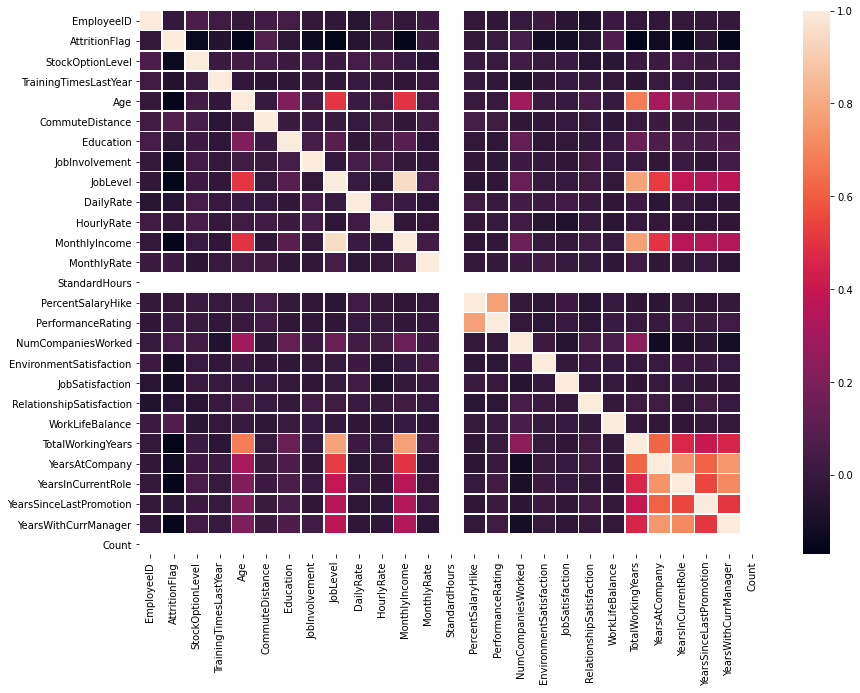

In [23]:
# ax = sns.heatmap(df.corr())

fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches
sns.heatmap(df.corr(), linewidths=.5, ax=ax)


In [24]:
df.AttritionFlag.sum()/df.Count.sum()

0.16122448979591836

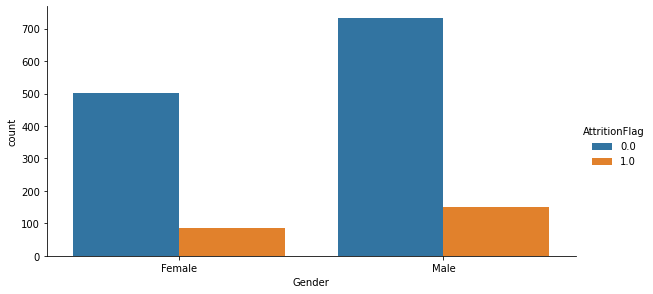

In [25]:
g = sns.catplot(x='Gender', hue='AttritionFlag', data=df, kind='count',height=4, aspect=2)

In [26]:
df[df['Gender']=='Male'].AttritionFlag.value_counts()/len(df[df['Gender']=='Male'])

0.0    0.829932
1.0    0.170068
Name: AttritionFlag, dtype: float64

In [27]:
df[df['Gender']=='Female'].AttritionFlag.value_counts()/len(df[df['Gender']=='Female'])

0.0    0.852041
1.0    0.147959
Name: AttritionFlag, dtype: float64

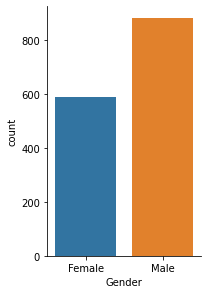

In [28]:
g = sns.catplot(x='Gender', data=df, kind='count',height=4, aspect=.7)

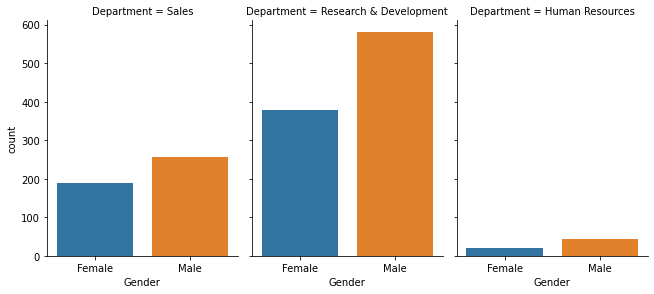

In [29]:
g = sns.catplot(x='Gender', col='Department',data=df, kind='count',height=4, aspect=.75)

In [30]:
df.pivot_table(values = 'Count', index = ['Department', 'Gender'], aggfunc=np.sum)

Count
Department             Gender       
Human Resources        Female     20
                       Male       43
Research & Development Female    379
                       Male      582
Sales                  Female    189
                       Male      257

In [31]:
a = pd.DataFrame(df.pivot_table(values=['AttritionFlag','Count'], index = ['Gender'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

,AttritionFlag,Count,Attrition%
Gender,,,
Female,87.0,588,14.80
Male,150.0,882,17.01


In [32]:
a = pd.DataFrame(df.pivot_table(values=['AttritionFlag','Count'], index = ['Department','Gender'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

AttritionFlag  Count  Attrition%
Department             Gender                                  
Human Resources        Female            6.0     20       30.00
                       Male              6.0     43       13.95
Research & Development Female           43.0    379       11.35
                       Male             90.0    582       15.46
Sales                  Female           38.0    189       20.11
                       Male             54.0    257       21.01

In [33]:
df['Gender'].value_counts()/len(df['Gender'])

Male      0.6
Female    0.4
Name: Gender, dtype: float64

Attrition percengage is higher amoung **Male** colleagues *(17%)* as opposed to **Female** colleagues *(17%)*.

In [34]:
df.Count.sum()

1470

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

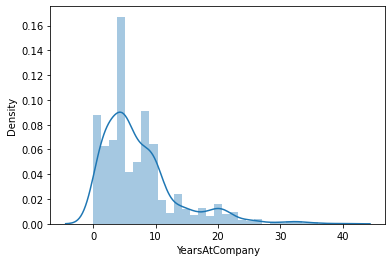

In [35]:
sns.distplot(df[df.AttritionFlag == 0].YearsAtCompany)

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

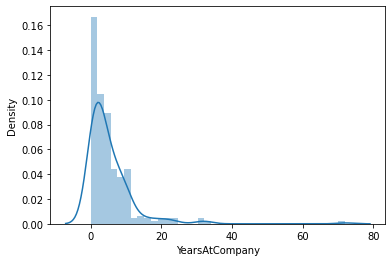

In [36]:
sns.distplot(df[df.AttritionFlag == 1].YearsAtCompany)

In the above two charts, we can see that colleagues are more at risk of attrition at the start of their tenure with the company.

In [37]:
len(df[(df.AttritionFlag == 1) & (df.Department == 'Sales')])/len(df[df.Department == 'Sales'])

0.2062780269058296

In [38]:
len(df[(df.AttritionFlag == 1) & (df.Department == 'Research & Development')])/len(df[df.Department == 'Research & Development'])

0.1383975026014568

In [39]:
len(df[(df.AttritionFlag == 1) & (df.Department == 'Human Resources')])/len(df[df.Department == 'Human Resources'])

0.19047619047619047

Attrition is highest in the **Sales** and **Human Resources** departments. However, **Human Resources**  only comprises of just over 4% of the population, more focus should be on the reasons for attrition within **Sales** department.

In [40]:
dfsales = df[(df.Department == 'Sales')]
dfsales

,EmployeeID,AttritionFlag,StockOptionLevel,TrainingTimesLastYear,Age,CommuteDistance,Education,EducationField,Gender,MaritalStatus,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count
0,10001,1.0,0,0,41.0,1.0,2.0,Life Sciences,Female,Single,...,2.0,4.0,1.0,4.0,8.0,6.0,4.0,0.0,5.0,1
18,10019,0.0,0,3,53.0,2.0,4.0,Life Sciences,Female,Married,...,1.0,4.0,3.0,3.0,31.0,25.0,8.0,3.0,7.0,1
21,10022,1.0,0,4,36.0,9.0,4.0,Life Sciences,Male,Single,...,3.0,1.0,2.0,3.0,10.0,5.0,3.0,0.0,3.0,1
27,10028,0.0,1,2,42.0,8.0,4.0,Marketing,Male,Married,...,3.0,2.0,4.0,3.0,10.0,9.0,7.0,4.0,2.0,1
29,10030,0.0,0,2,46.0,2.0,4.0,Marketing,Female,Single,...,2.0,1.0,4.0,3.0,22.0,2.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,11455,0.0,0,3,45.0,20.0,3.0,Life Sciences,Female,Single,...,4.0,3.0,3.0,3.0,8.0,5.0,3.0,0.0,1.0,1
1461,11462,1.0,1,3,50.0,28.0,3.0,Marketing,Male,Divorced,...,4.0,1.0,2.0,3.0,20.0,3.0,2.0,2.0,0.0,1
1462,11463,0.0,1,2,39.0,24.0,1.0,Marketing,Female,Married,...,2.0,4.0,1.0,3.0,21.0,20.0,9.0,9.0,6.0,1
1464,11465,0.0,0,2,26.0,5.0,3.0,Other,Female,Single,...,4.0,3.0,4.0,3.0,5.0,4.0,2.0,0.0,0.0,1


In [41]:
dfsales

,EmployeeID,AttritionFlag,StockOptionLevel,TrainingTimesLastYear,Age,CommuteDistance,Education,EducationField,Gender,MaritalStatus,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count
0,10001,1.0,0,0,41.0,1.0,2.0,Life Sciences,Female,Single,...,2.0,4.0,1.0,4.0,8.0,6.0,4.0,0.0,5.0,1
18,10019,0.0,0,3,53.0,2.0,4.0,Life Sciences,Female,Married,...,1.0,4.0,3.0,3.0,31.0,25.0,8.0,3.0,7.0,1
21,10022,1.0,0,4,36.0,9.0,4.0,Life Sciences,Male,Single,...,3.0,1.0,2.0,3.0,10.0,5.0,3.0,0.0,3.0,1
27,10028,0.0,1,2,42.0,8.0,4.0,Marketing,Male,Married,...,3.0,2.0,4.0,3.0,10.0,9.0,7.0,4.0,2.0,1
29,10030,0.0,0,2,46.0,2.0,4.0,Marketing,Female,Single,...,2.0,1.0,4.0,3.0,22.0,2.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,11455,0.0,0,3,45.0,20.0,3.0,Life Sciences,Female,Single,...,4.0,3.0,3.0,3.0,8.0,5.0,3.0,0.0,1.0,1
1461,11462,1.0,1,3,50.0,28.0,3.0,Marketing,Male,Divorced,...,4.0,1.0,2.0,3.0,20.0,3.0,2.0,2.0,0.0,1
1462,11463,0.0,1,2,39.0,24.0,1.0,Marketing,Female,Married,...,2.0,4.0,1.0,3.0,21.0,20.0,9.0,9.0,6.0,1
1464,11465,0.0,0,2,26.0,5.0,3.0,Other,Female,Single,...,4.0,3.0,4.0,3.0,5.0,4.0,2.0,0.0,0.0,1


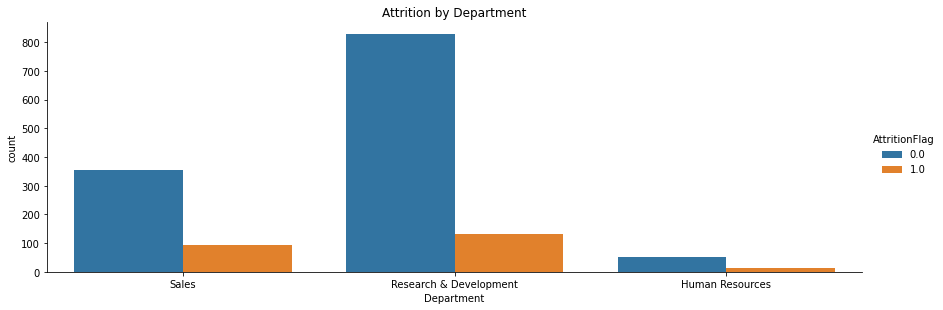

In [42]:
g = sns.catplot(x='Department', hue='AttritionFlag', data=df, kind='count',height=4, aspect=3)
g.set(title='Attrition by Department')

In [43]:
a = pd.DataFrame(df.pivot_table(values=['AttritionFlag','Count'], index = ['Department'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

,AttritionFlag,Count,Attrition%
Department,,,
Human Resources,12.0,63,19.05
Research & Development,133.0,961,13.84
Sales,92.0,446,20.63


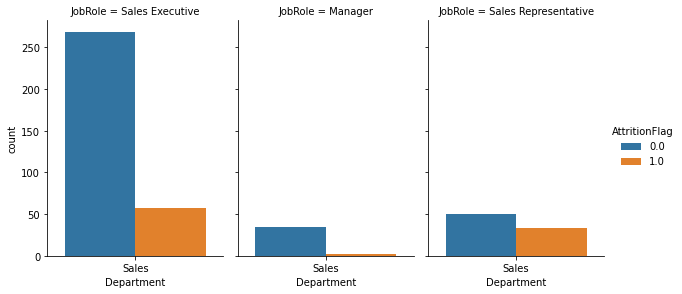

In [44]:
g = sns.catplot(x='Department', hue='AttritionFlag', col='JobRole',data=dfsales, kind='count',height=4, aspect=.7)

In [45]:
a = pd.DataFrame(df[df.Department == 'Sales'].pivot_table(values=['AttritionFlag','Count'], index = ['Department','JobRole'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

AttritionFlag  Count  Attrition%
Department JobRole                                               
Sales      Manager                         2.0     37        5.41
           Sales Executive                57.0    326       17.48
           Sales Representative           33.0     83       39.76

In [46]:
dfsales.JobRole.value_counts()

Sales Executive         326
Sales Representative     83
Manager                  37
Name: JobRole, dtype: int64

In [47]:
for i in list(dfsales.JobRole.unique()):
    print(i + ' - Attrition%: ' + str(round(dfsales[dfsales.JobRole==i].AttritionFlag.sum()/len(dfsales[dfsales.JobRole==i]),4)*100)+ ' Total HC: '+str(len(dfsales[dfsales.JobRole==i])) + ' Exited HC: '+str(dfsales[dfsales.JobRole==i].AttritionFlag.sum()))

Sales Executive - Attrition%: 17.48 Total HC: 326 Exited HC: 57.0
Manager - Attrition%: 5.41 Total HC: 37 Exited HC: 2.0
Sales Representative - Attrition%: 39.76 Total HC: 83 Exited HC: 33.0


In [48]:
dfsales[dfsales.JobRole=='Sales Executive'].AttritionFlag

0       1.0
27      0.0
39      0.0
43      0.0
46      0.0
       ... 
1453    0.0
1454    0.0
1461    1.0
1462    0.0
1468    0.0
Name: AttritionFlag, Length: 326, dtype: float64

Within the **Sales** department, **Sales Executive** roles seem to have the highest number of attrition. However, in terms of percentage **Sales Representative** roles seem to have the highest attrition at close to **40%**.

### Looking deeper into the scores for ESat Survey

#### Rating Key

EnvironmentSatisfaction:

- 1 - 'Low'
- 2 - 'Medium'
- 3 - 'High'
- 4 - 'Very High'
	
JobSatisfaction:

- 1 - 'Low'
- 2 - 'Medium'
- 3 - 'High'
- 4 - 'Very High'
	
RelationshipSatisfaction:

- 1 - 'Low'
- 2 - 'Medium'
- 3 - 'High'
- 4 - 'Very High'
	
WorkLifeBalance:

- 1 - 'Best'
- 2 - 'Better'
- 3 - 'Good'
- 4 - 'Bad'

In [49]:
dfsales['EnvironmentSatisfaction']

0       2.0
18      1.0
21      3.0
27      3.0
29      2.0
       ... 
1454    4.0
1461    4.0
1462    2.0
1464    4.0
1468    4.0
Name: EnvironmentSatisfaction, Length: 446, dtype: float64

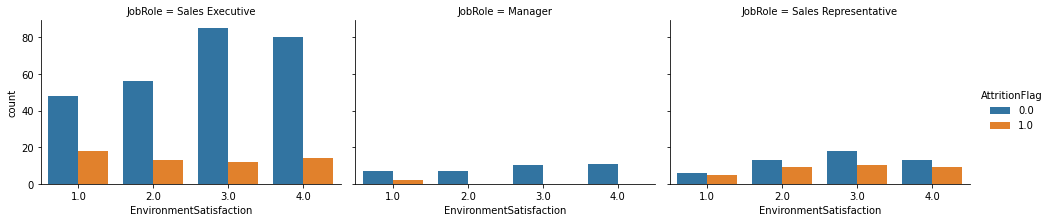

In [50]:
g = sns.catplot(x='EnvironmentSatisfaction', hue='AttritionFlag', col='JobRole',data=dfsales, kind='count',height=3, aspect=1.5)

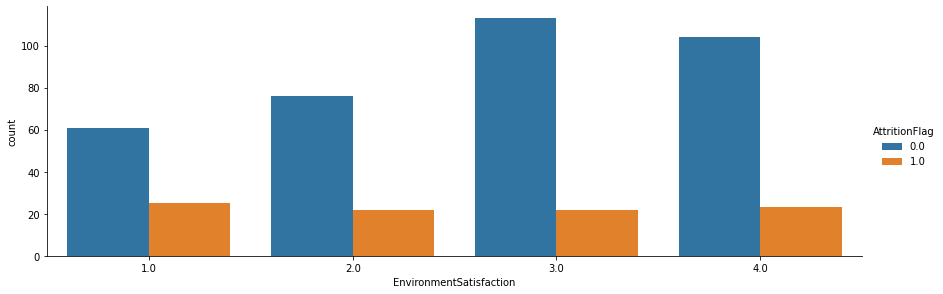

In [51]:
g = sns.catplot(x='EnvironmentSatisfaction', hue='AttritionFlag',data=dfsales, kind='count',height=4, aspect=3)

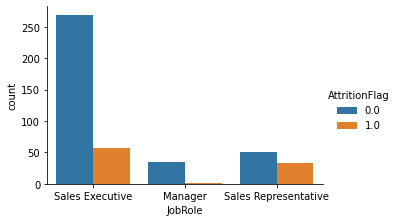

In [52]:
g = sns.catplot(x='JobRole', hue='AttritionFlag', data=dfsales, kind='count',height=3, aspect=1.5)

In [53]:
a = list(dfsales['EnvironmentSatisfaction'].unique())
a.sort()
a

[1.0, 2.0, 3.0, 4.0]

In [54]:
role = []
hc = []
envsat_rating = []
att_hc = []
att_pc = []
for i in list(dfsales.JobRole.unique()):
    for j in a:
        role.append(i)
        envsat_rating.append(j)
        
        x = len(dfsales[(dfsales.JobRole==i)&(dfsales['EnvironmentSatisfaction']==j)])
        hc.append(x)
        
        y = dfsales[(dfsales.JobRole==i)&(dfsales['EnvironmentSatisfaction']==j)].AttritionFlag.sum()
        att_hc.append(y)
        
        z = round(y/x,4)*100
        att_pc.append(z)

In [55]:
pd.DataFrame({'JobRole': role, 'EnvSatRating': envsat_rating, 'RatingHeadcount': hc,  'AttritionHC': att_hc, 'PercentageAtt': att_pc})

,JobRole,EnvSatRating,RatingHeadcount,AttritionHC,PercentageAtt
0,Sales Executive,1.0,66,18.0,27.27
1,Sales Executive,2.0,69,13.0,18.84
2,Sales Executive,3.0,97,12.0,12.37
3,Sales Executive,4.0,94,14.0,14.89
4,Manager,1.0,9,2.0,22.22
5,Manager,2.0,7,0.0,0.00
6,Manager,3.0,10,0.0,0.00
7,Manager,4.0,11,0.0,0.00
8,Sales Representative,1.0,11,5.0,45.45
9,Sales Representative,2.0,22,9.0,40.91


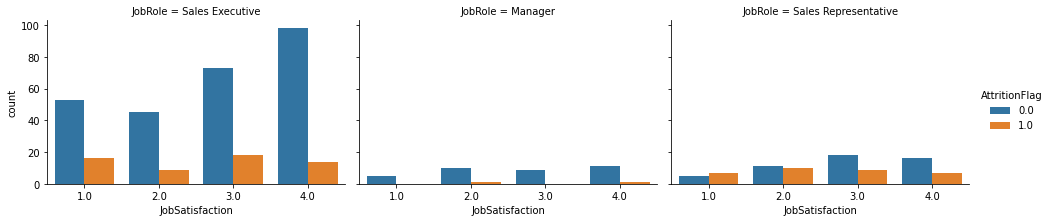

In [56]:
g = sns.catplot(x='JobSatisfaction', hue='AttritionFlag', col='JobRole',data=dfsales, kind='count',height=3, aspect=1.5)

In [57]:
role = []
hc = []
jobsat_rating = []
att_hc = []
att_pc = []
for i in list(dfsales.JobRole.unique()):
    for j in a:
        role.append(i)
        jobsat_rating.append(j)
        
        x = len(dfsales[(dfsales.JobRole==i)&(dfsales['JobSatisfaction']==j)])
        hc.append(x)
        
        y = dfsales[(dfsales.JobRole==i)&(dfsales['JobSatisfaction']==j)].AttritionFlag.sum()
        att_hc.append(y)
        
        z = round(y/x,4)*100
        att_pc.append(z)
pd.DataFrame({'JobRole': role, 'JobSatRating': jobsat_rating, 'HeadcountRating': hc,  'AttritionHC': att_hc, 'PercentageAtt': att_pc})

,JobRole,JobSatRating,HeadcountRating,AttritionHC,PercentageAtt
0,Sales Executive,1.0,69,16.0,23.19
1,Sales Executive,2.0,54,9.0,16.67
2,Sales Executive,3.0,91,18.0,19.78
3,Sales Executive,4.0,112,14.0,12.50
4,Manager,1.0,5,0.0,0.00
5,Manager,2.0,11,1.0,9.09
6,Manager,3.0,9,0.0,0.00
7,Manager,4.0,12,1.0,8.33
8,Sales Representative,1.0,12,7.0,58.33
9,Sales Representative,2.0,21,10.0,47.62


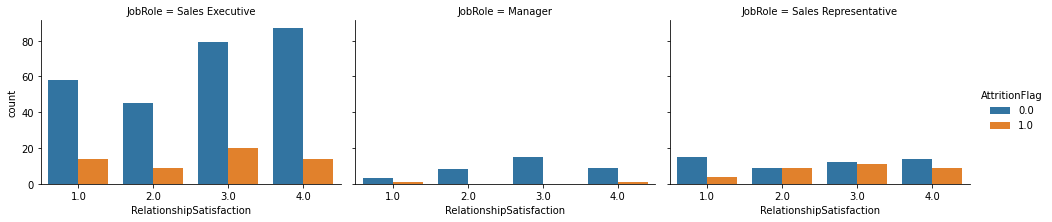

In [58]:
g = sns.catplot(x='RelationshipSatisfaction', hue='AttritionFlag', col='JobRole',data=dfsales, kind='count',height=3, aspect=1.5)

In [59]:
role = []
hc = []
relsat_rating = []
att_hc = []
att_pc = []
for i in list(dfsales.JobRole.unique()):
    for j in a:
        role.append(i)
        relsat_rating.append(j)
        
        x = len(dfsales[(dfsales.JobRole==i)&(dfsales['RelationshipSatisfaction']==j)])
        hc.append(x)
        
        y = dfsales[(dfsales.JobRole==i)&(dfsales['RelationshipSatisfaction']==j)].AttritionFlag.sum()
        att_hc.append(y)
        
        z = round(y/x,4)*100
        att_pc.append(z)
pd.DataFrame({'JobRole': role, 'RelSatRating': relsat_rating, 'HeadcountRating': hc,  'AttritionHC': att_hc, 'PercentageAtt': att_pc})

,JobRole,RelSatRating,HeadcountRating,AttritionHC,PercentageAtt
0,Sales Executive,1.0,72,14.0,19.44
1,Sales Executive,2.0,54,9.0,16.67
2,Sales Executive,3.0,99,20.0,20.20
3,Sales Executive,4.0,101,14.0,13.86
4,Manager,1.0,4,1.0,25.00
5,Manager,2.0,8,0.0,0.00
6,Manager,3.0,15,0.0,0.00
7,Manager,4.0,10,1.0,10.00
8,Sales Representative,1.0,19,4.0,21.05
9,Sales Representative,2.0,18,9.0,50.00


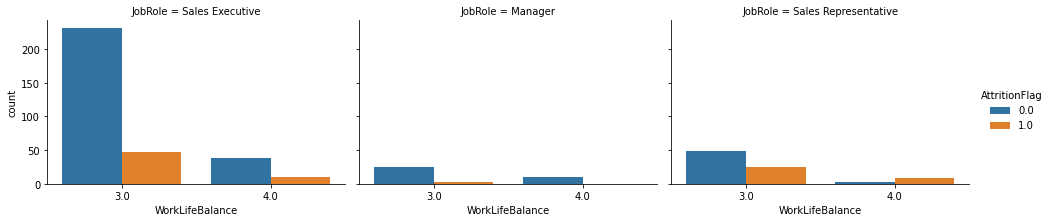

In [60]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', col='JobRole',data=dfsales, kind='count',height=3, aspect=1.5)

In [61]:
role = []
hc = []
wlbal_rating = []
att_hc = []
att_pc = []
for i in list(dfsales.JobRole.unique()):
    for j in a:
        role.append(i)
        wlbal_rating.append(j)
        
        x = len(dfsales[(dfsales.JobRole==i)&(dfsales['WorkLifeBalance']==j)])
        hc.append(x)
        
        y = dfsales[(dfsales.JobRole==i)&(dfsales['WorkLifeBalance']==j)].AttritionFlag.sum()
        att_hc.append(y)
        
        z = round(y/x,4)*100
        att_pc.append(z)
pd.DataFrame({'JobRole': role, 'WLBalRating': wlbal_rating, 'HeadcountRating': hc,  'AttritionHC': att_hc, 'PercentageAtt': att_pc})

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,JobRole,WLBalRating,HeadcountRating,AttritionHC,PercentageAtt
0,Sales Executive,1.0,0,0.0,NaN
1,Sales Executive,2.0,0,0.0,NaN
2,Sales Executive,3.0,278,47.0,16.91
3,Sales Executive,4.0,48,10.0,20.83
4,Manager,1.0,0,0.0,NaN
5,Manager,2.0,0,0.0,NaN
6,Manager,3.0,27,2.0,7.41
7,Manager,4.0,10,0.0,0.00
8,Sales Representative,1.0,0,0.0,NaN
9,Sales Representative,2.0,0,0.0,NaN


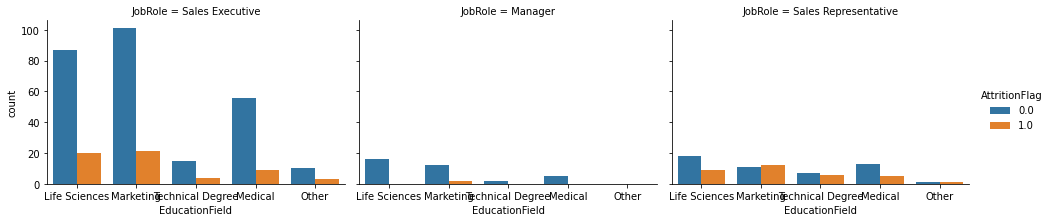

In [62]:
g = sns.catplot(x='EducationField',  hue='AttritionFlag', col='JobRole',data=dfsales[dfsales.Department == 'Sales'], kind='count',height=3, aspect=1.5)

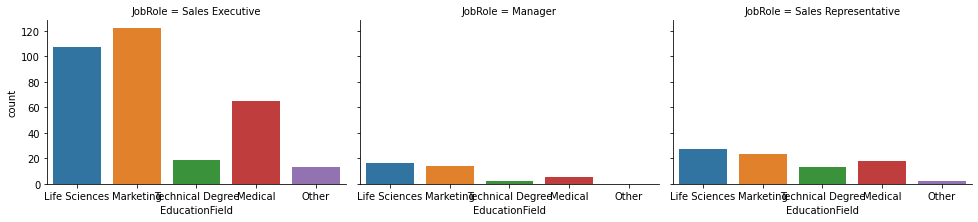

In [63]:
g = sns.catplot(x='EducationField',  col='JobRole',data=dfsales[dfsales.Department == 'Sales'], kind='count',height=3, aspect=1.5)

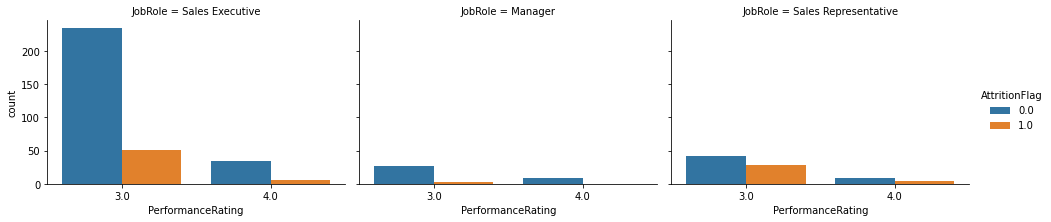

In [64]:
g = sns.catplot(x='PerformanceRating',  hue='AttritionFlag', col='JobRole',data=dfsales[dfsales.Department == 'Sales'], kind='count',height=3, aspect=1.5)

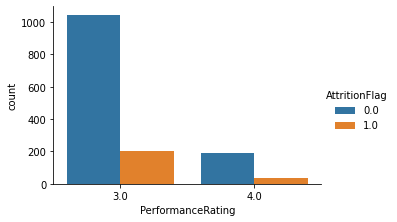

In [65]:
g = sns.catplot(x='PerformanceRating',  hue='AttritionFlag', data=df, kind='count',height=3, aspect=1.5)

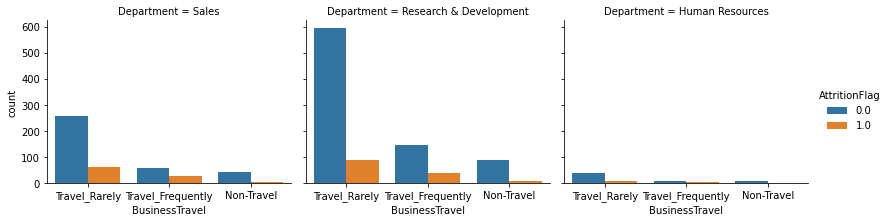

In [66]:
g = sns.catplot(x='BusinessTravel',  hue='AttritionFlag', col='Department',data=df, kind='count',height=3, aspect=1.25)

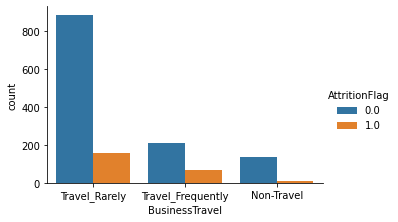

In [67]:
g = sns.catplot(x='BusinessTravel',  hue='AttritionFlag', data=df, kind='count',height=3, aspect=1.5)

In [68]:
df.CommuteDistance.max()

29.0

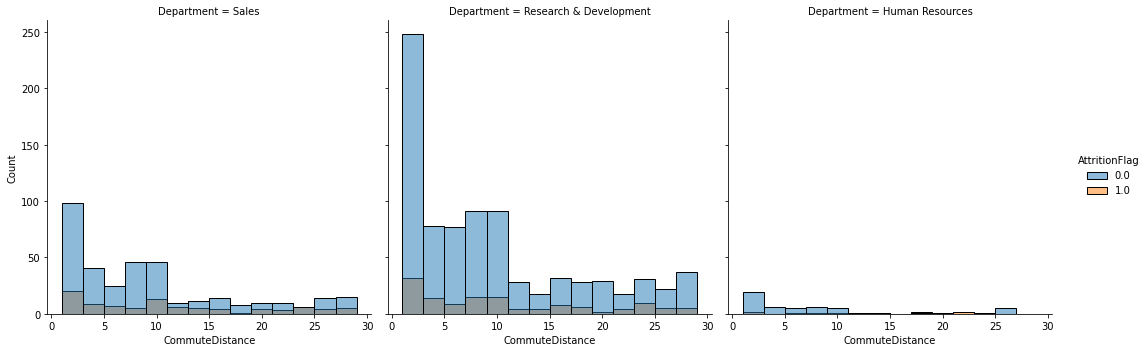

In [69]:
sns.displot(df, x="CommuteDistance", hue="AttritionFlag", col = 'Department', fill=True)


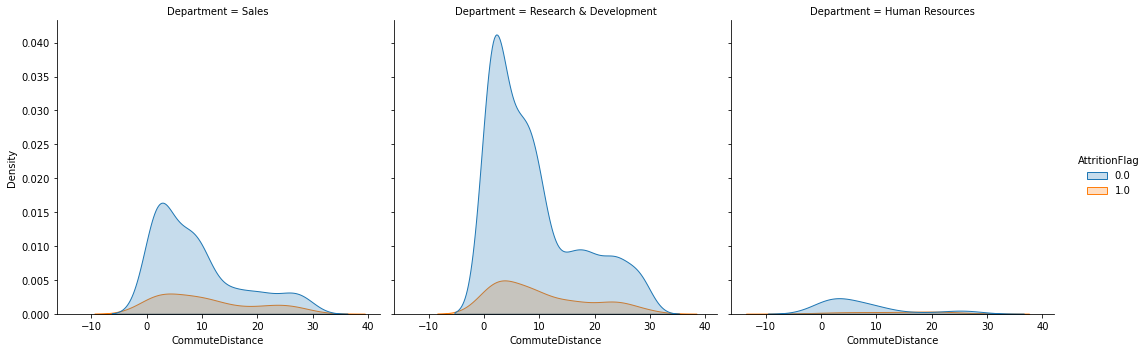

In [70]:
sns.displot(df, x="CommuteDistance", hue="AttritionFlag", col = 'Department', kind="kde", fill=True)


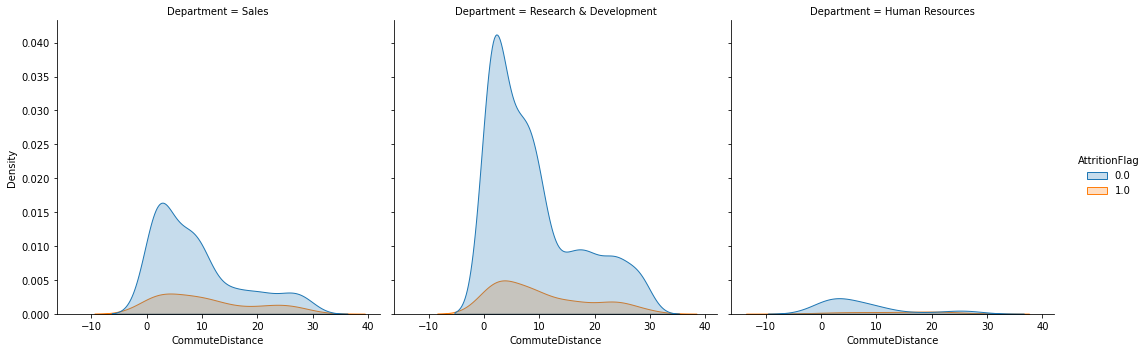

In [71]:
sns.displot(df, x="CommuteDistance", hue="AttritionFlag", col = 'Department', kind="kde", fill=True)

In [72]:
a = pd.DataFrame(df[df.Department == 'Human Resources'].pivot_table(values=['AttritionFlag','Count'], index = ['Department','JobRole'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

AttritionFlag  Count  Attrition%
Department      JobRole                                          
Human Resources Human Resources           12.0     52       23.08
                Manager                    0.0     11        0.00

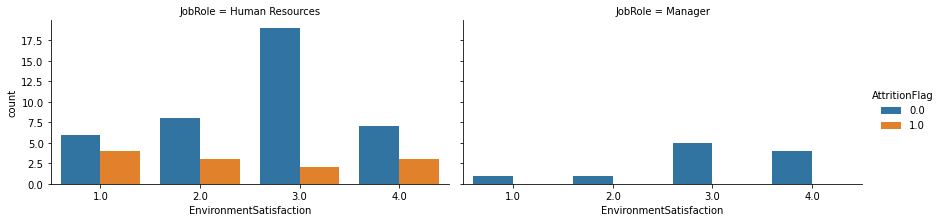

In [73]:
g = sns.catplot(x='EnvironmentSatisfaction', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

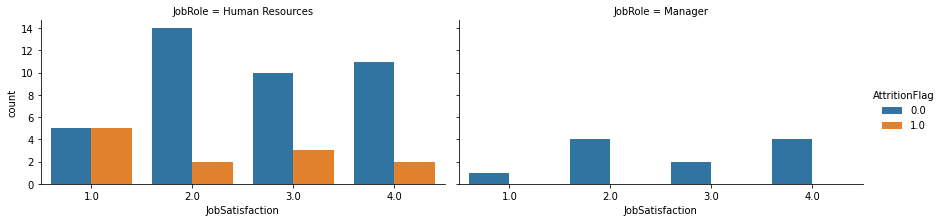

In [74]:
g = sns.catplot(x='JobSatisfaction', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

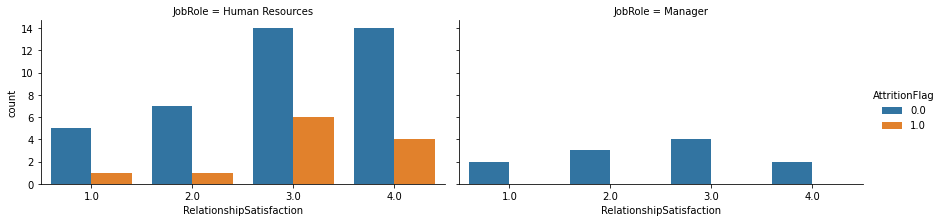

In [75]:
g = sns.catplot(x='RelationshipSatisfaction', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

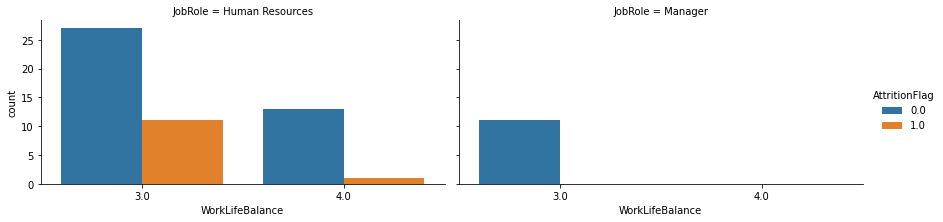

In [76]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

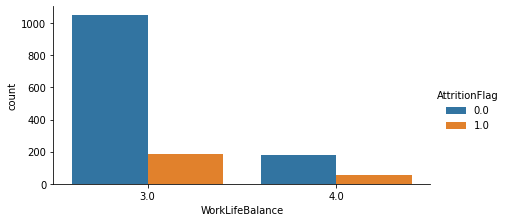

In [77]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', data=df, kind='count',height=3, aspect=2)

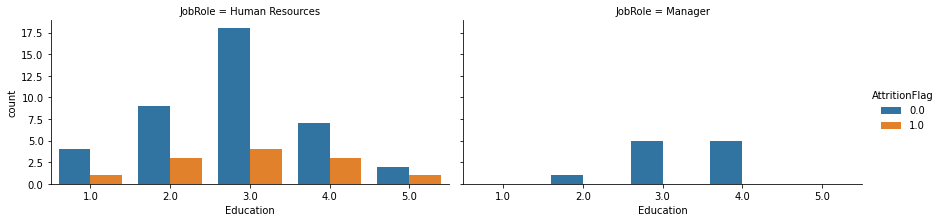

In [78]:
g = sns.catplot(x='Education', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

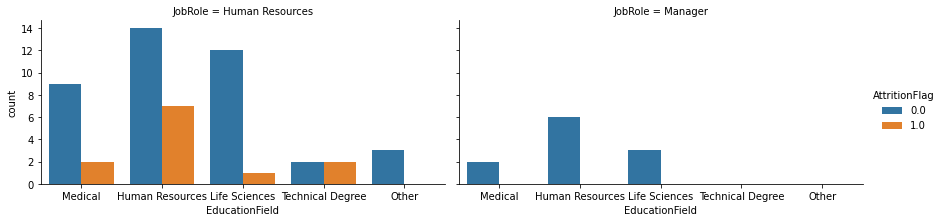

In [79]:
g = sns.catplot(x='EducationField', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

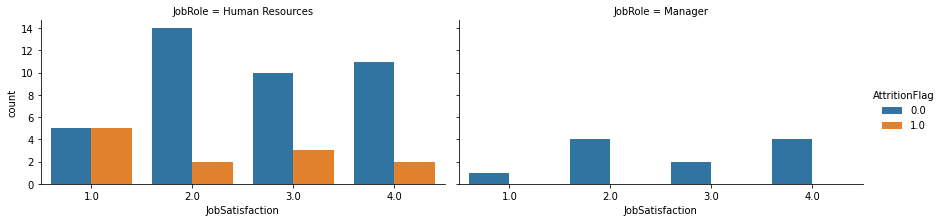

In [80]:
g = sns.catplot(x='JobSatisfaction', hue='AttritionFlag', col='JobRole',data=df[df.Department == 'Human Resources'], kind='count',height=3, aspect=2)

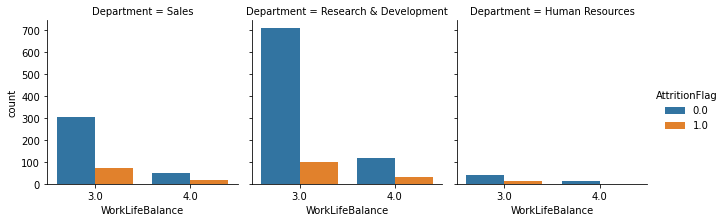

In [81]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', col='Department',data=df, kind='count',height=3, aspect=1)

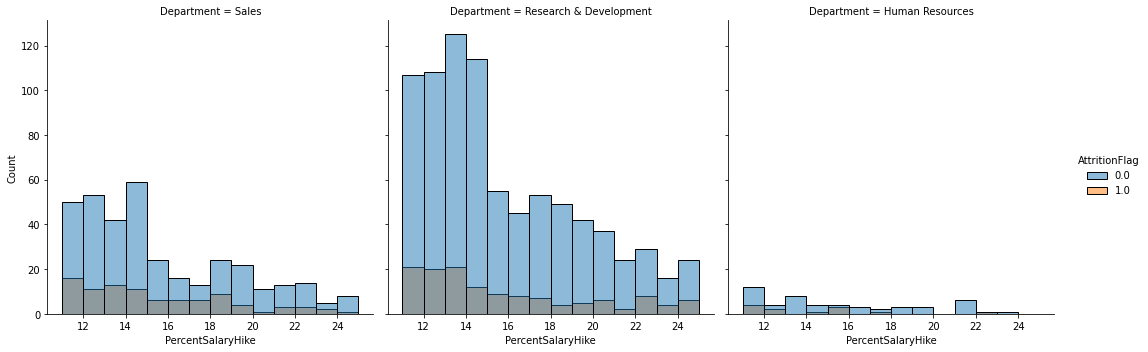

In [82]:
sns.displot(df, x="PercentSalaryHike", hue="AttritionFlag", col = 'Department', fill=True)

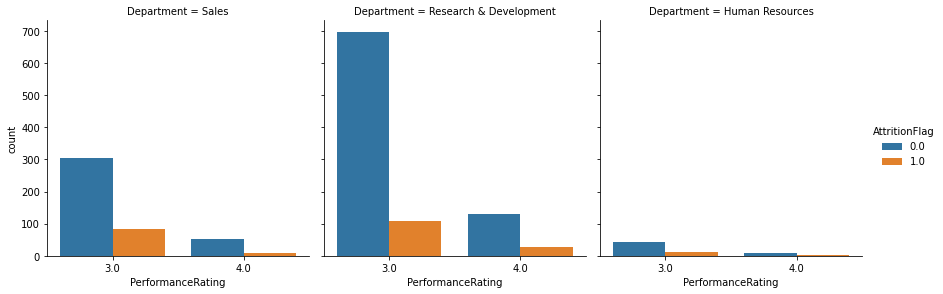

In [83]:
g = sns.catplot(x='PerformanceRating', hue='AttritionFlag', col='Department',data=df, kind='count',height=4, aspect=1)

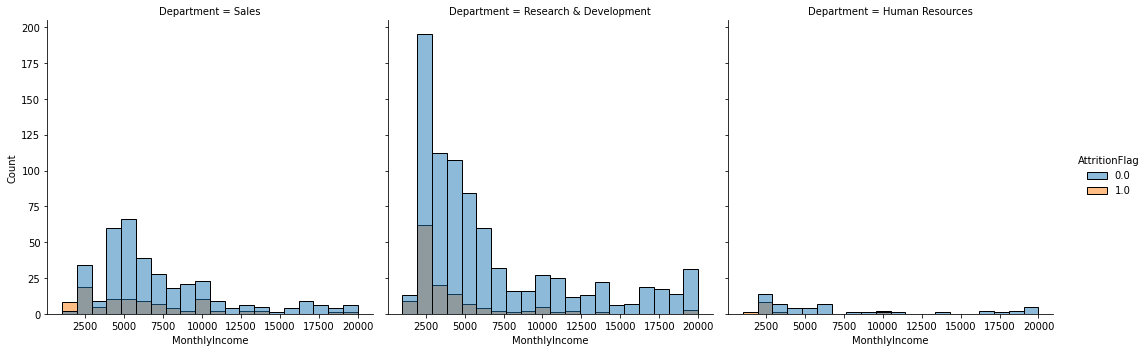

In [84]:
sns.displot(df, x="MonthlyIncome", hue="AttritionFlag", col = 'Department', fill=True)

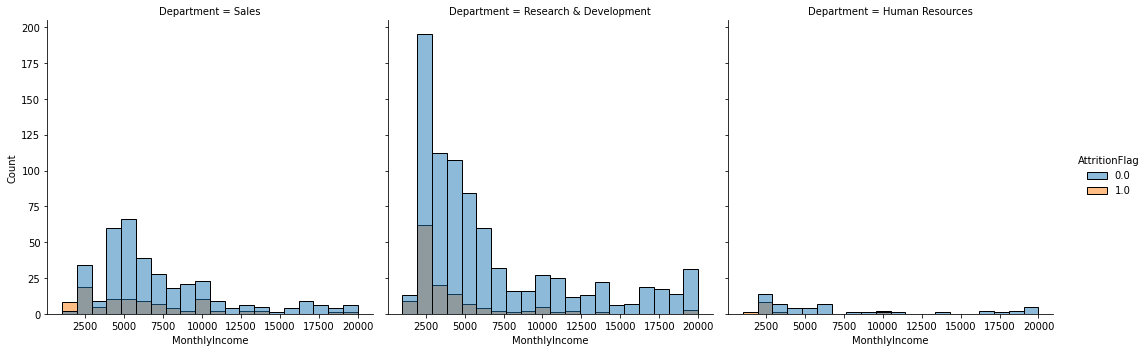

In [85]:
sns.displot(df, x="MonthlyIncome", hue="AttritionFlag", col = 'Department', fill=True)

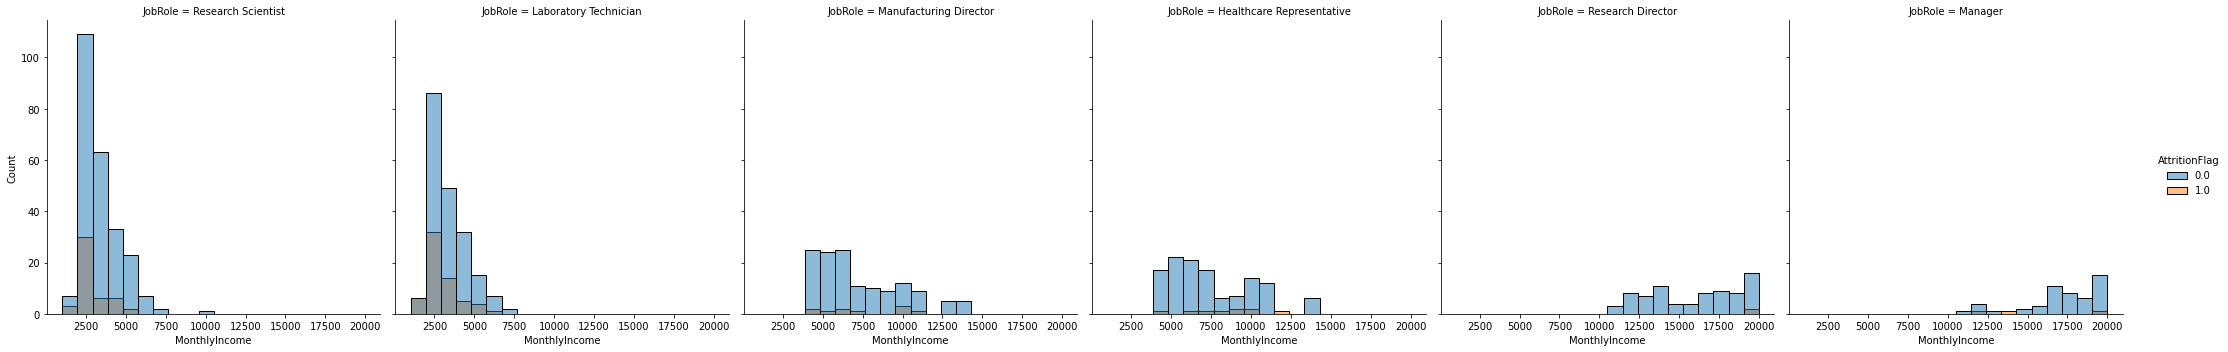

In [86]:
sns.displot(df[df.Department == 'Research & Development'], x="MonthlyIncome", hue="AttritionFlag", col = 'JobRole', fill=True)

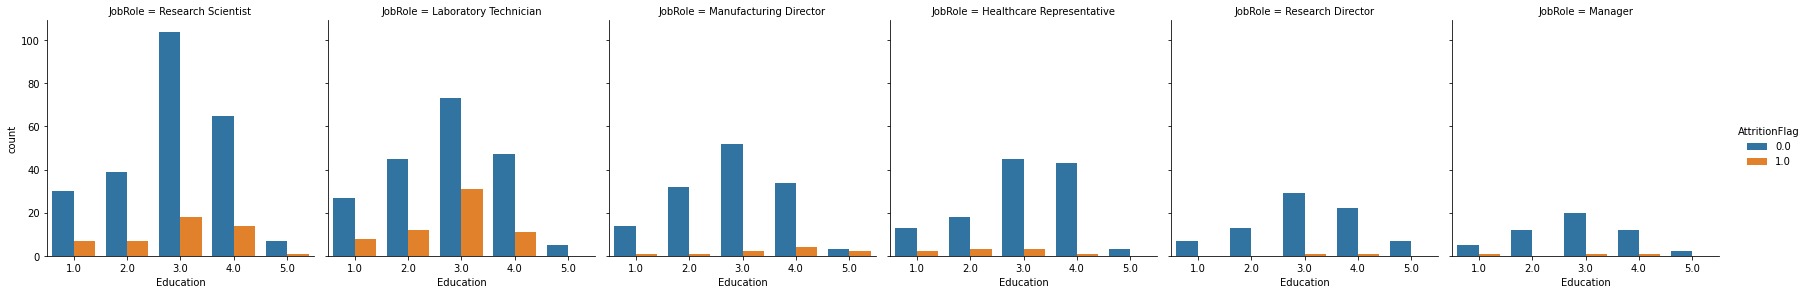

In [87]:
g = sns.catplot(x='Education', hue='AttritionFlag', col='JobRole',data=df[df.Department=='Research & Development'], kind='count',height=4, aspect=1)

In [88]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [89]:
a = pd.DataFrame(df[df.Department == 'Research & Development'].pivot_table(values=['AttritionFlag','Count'], index = ['Department','JobRole'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

AttritionFlag  Count  \
Department             JobRole                                           
Research & Development Healthcare Representative            9.0    131   
                       Laboratory Technician               62.0    259   
                       Manager                              3.0     54   
                       Manufacturing Director              10.0    145   
                       Research Director                    2.0     80   
                       Research Scientist                  47.0    292   

                                                  Attrition%  
Department             JobRole                                
Research & Development Healthcare Representative        6.87  
                       Laboratory Technician           23.94  
                       Manager                          5.56  
                       Manufacturing Director           6.90  
                       Research Director                2.50  
                       Research Scientist              16.10

In [90]:
dfhr = df[df.Department == 'Human Resources']

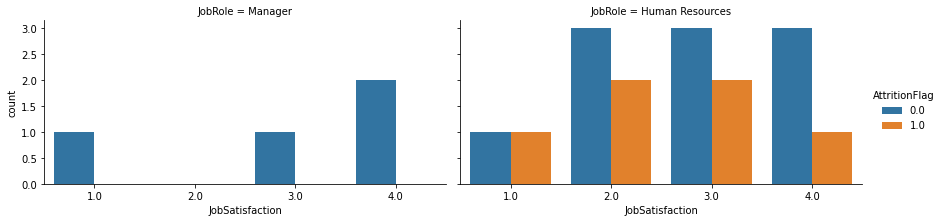

In [91]:
g = sns.catplot(x='JobSatisfaction', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

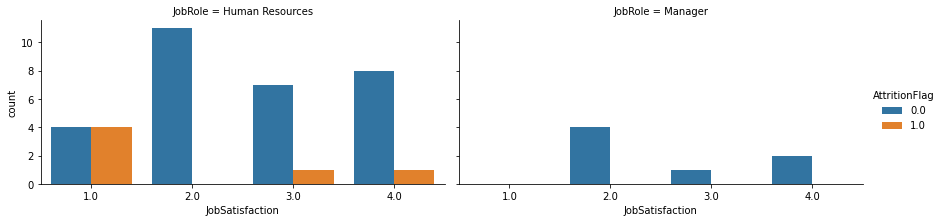

In [92]:
g = sns.catplot(x='JobSatisfaction', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Male'], kind='count',height=3, aspect=2)

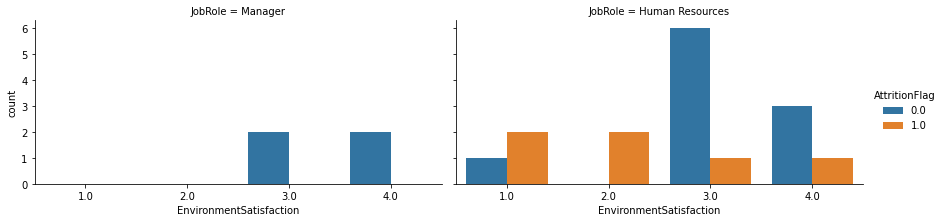

In [93]:
g = sns.catplot(x='EnvironmentSatisfaction', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

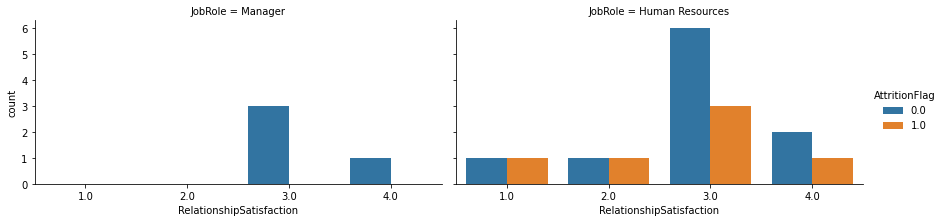

In [94]:
g = sns.catplot(x='RelationshipSatisfaction', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

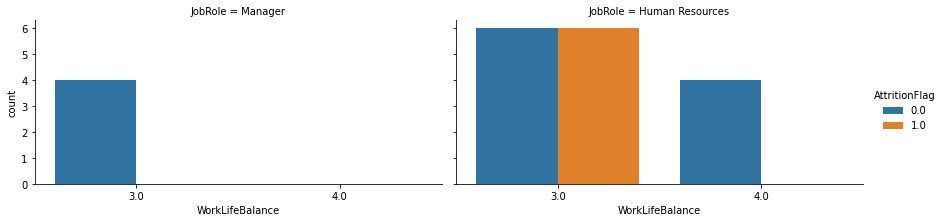

In [95]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

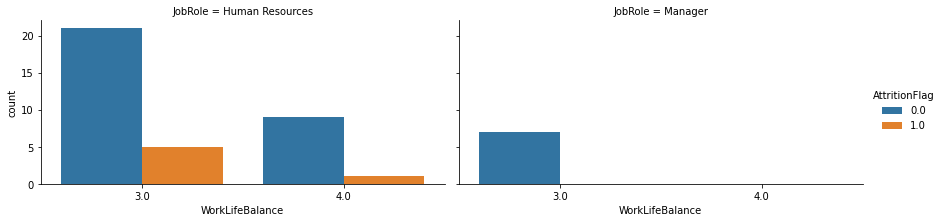

In [96]:
g = sns.catplot(x='WorkLifeBalance', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Male'], kind='count',height=3, aspect=2)

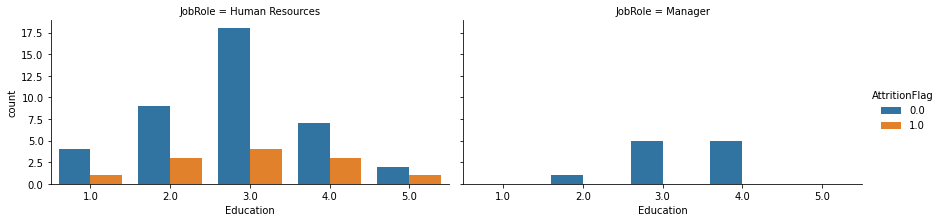

In [97]:
g = sns.catplot(x='Education', hue='AttritionFlag', col='JobRole',data=dfhr, kind='count',height=3, aspect=2)

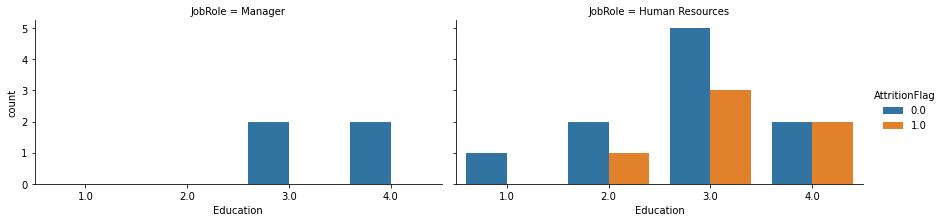

In [98]:
g = sns.catplot(x='Education', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

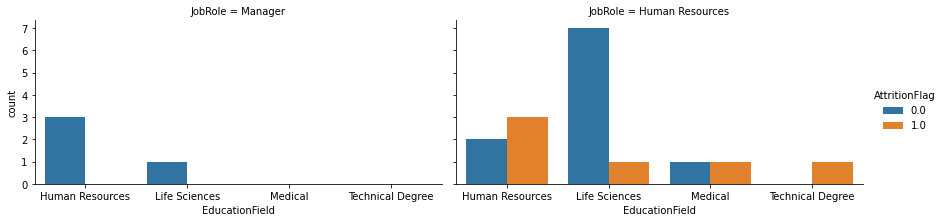

In [99]:
g = sns.catplot(x='EducationField', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Female'], kind='count',height=3, aspect=2)

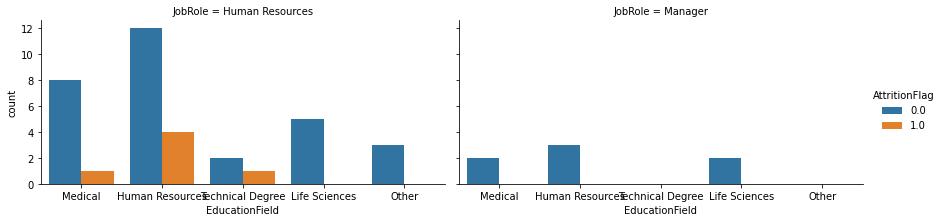

In [100]:
g = sns.catplot(x='EducationField', hue='AttritionFlag', col='JobRole',data=dfhr[dfhr.Gender == 'Male'], kind='count',height=3, aspect=2)

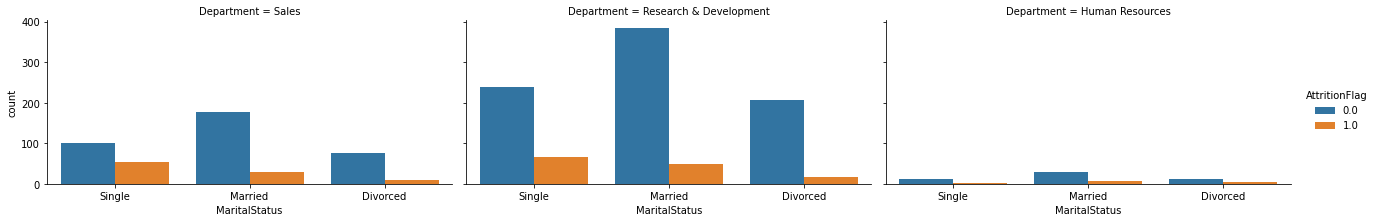

In [101]:
g = sns.catplot(x='MaritalStatus', hue='AttritionFlag', col='Department', data=df, kind='count',height=3, aspect=2)

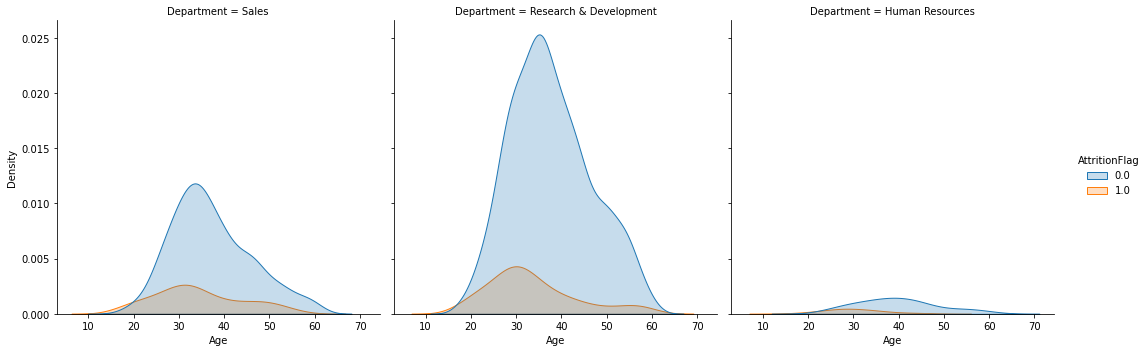

In [102]:
sns.displot(df, x="Age", hue="AttritionFlag", col = 'Department', kind="kde", fill=True)

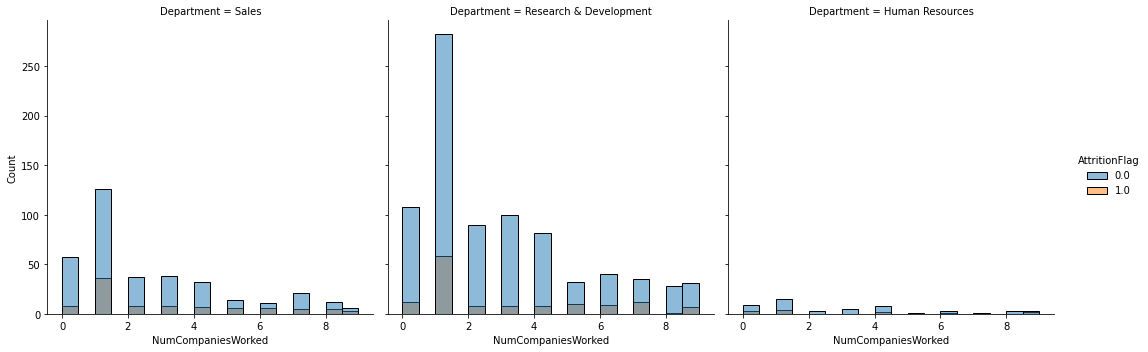

In [103]:
sns.displot(df, x="NumCompaniesWorked", hue="AttritionFlag", col = 'Department', fill=True)

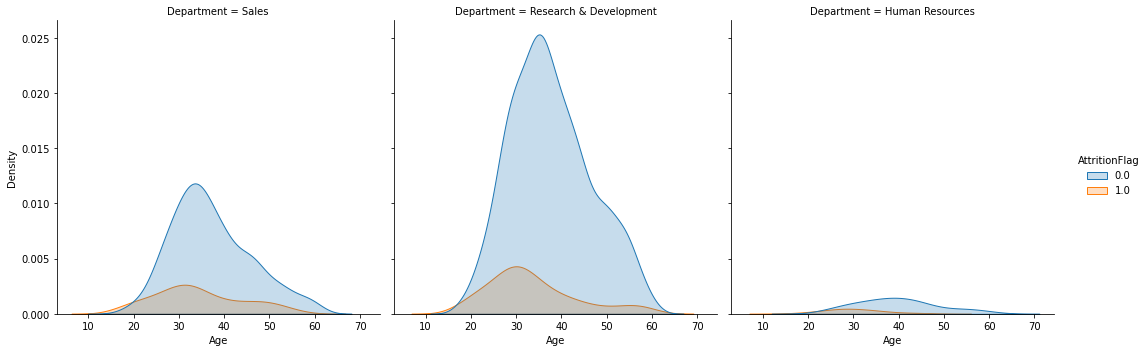

In [104]:
sns.displot(df, x="Age", hue="AttritionFlag", col = 'Department', kind="kde", fill=True)

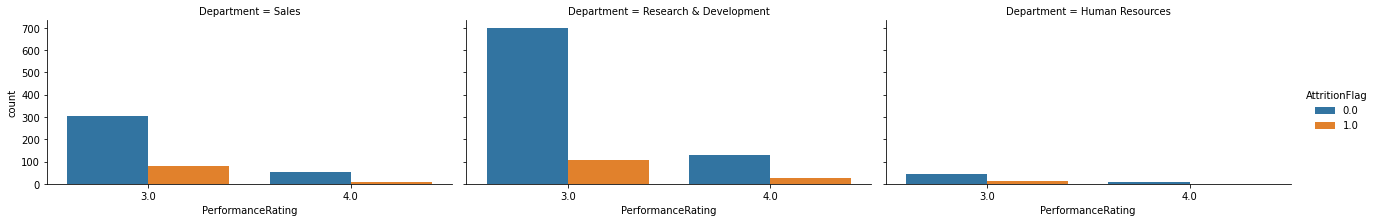

In [105]:
g = sns.catplot(x='PerformanceRating', hue='AttritionFlag', col='Department', data=df, kind='count',height=3, aspect=2)

In [106]:
df.PercentSalaryHike

0       11.0
1       23.0
2       15.0
3       11.0
4       12.0
        ... 
1465    17.0
1466    15.0
1467    20.0
1468    14.0
1469    12.0
Name: PercentSalaryHike, Length: 1470, dtype: float64

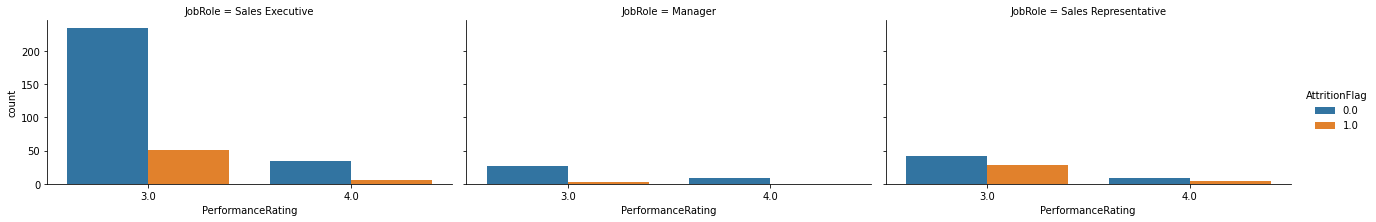

In [107]:
g = sns.catplot(x='PerformanceRating', hue='AttritionFlag', col='JobRole', data=df[df.Department=='Sales'], kind='count',height=3, aspect=2)

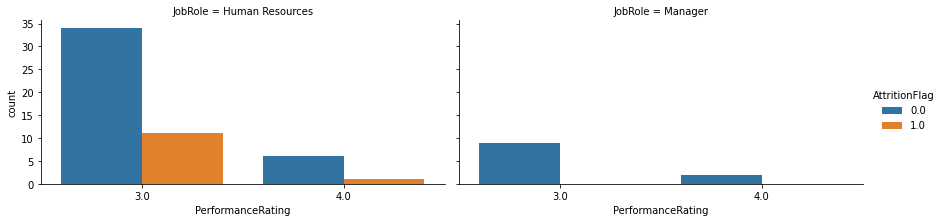

In [108]:
g = sns.catplot(x='PerformanceRating', hue='AttritionFlag', col='JobRole', data=df[df.Department=='Human Resources'], kind='count',height=3, aspect=2)

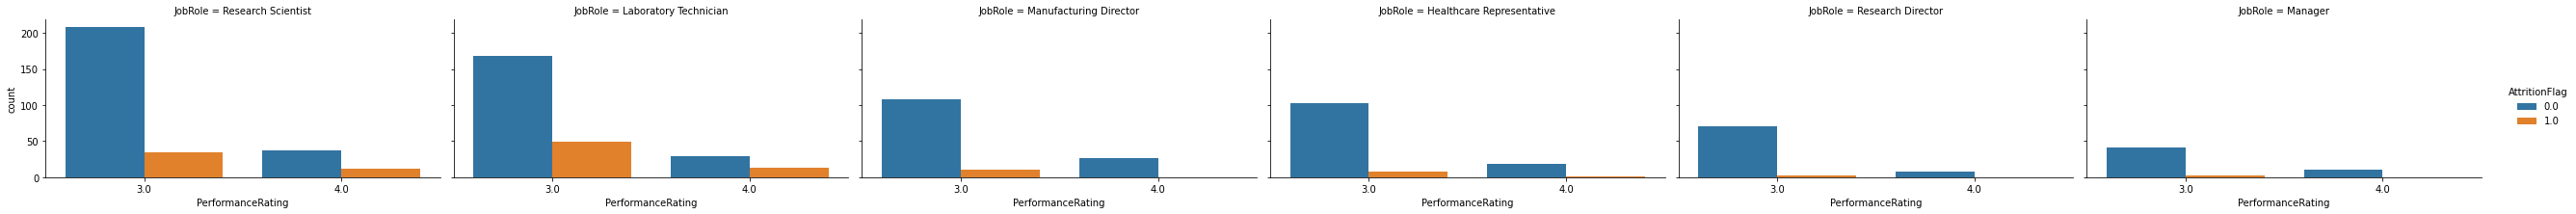

In [109]:
g = sns.catplot(x='PerformanceRating', hue='AttritionFlag', col='JobRole', data=df[df.Department=='Research & Development'], kind='count',height=3, aspect=2)

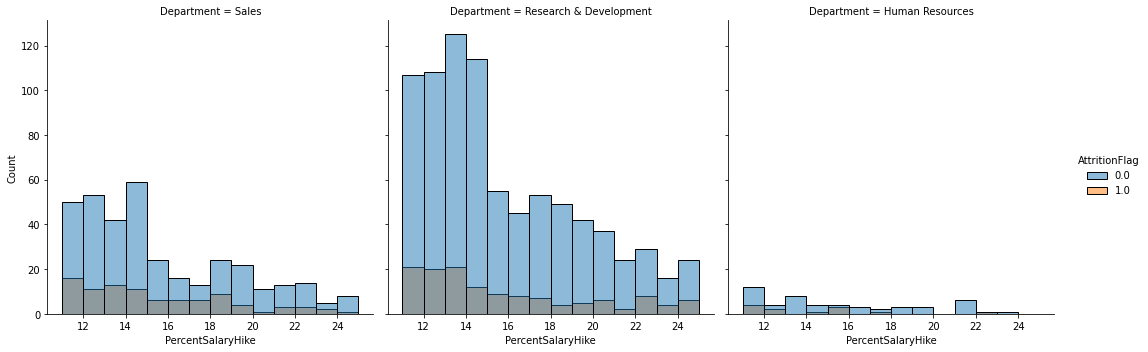

In [110]:
sns.displot(df, x="PercentSalaryHike", hue="AttritionFlag", col = 'Department', fill=True)

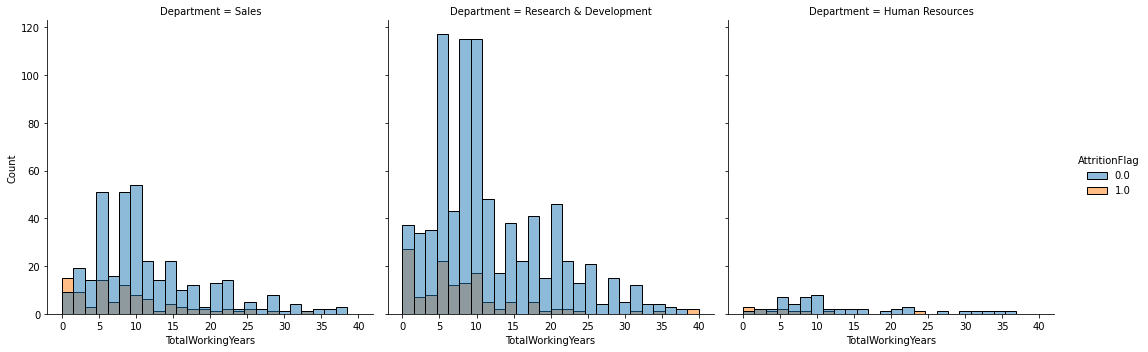

In [111]:
sns.displot(df, x="TotalWorkingYears", hue="AttritionFlag", col = 'Department', fill=True)

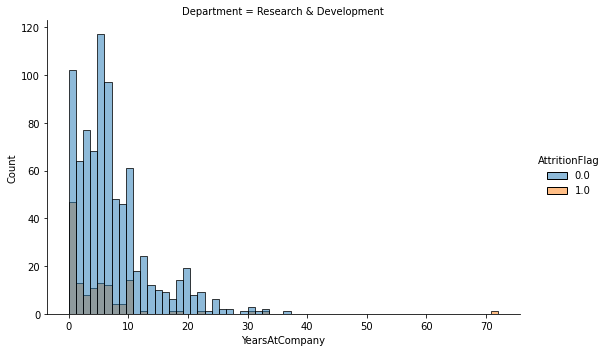

In [112]:
sns.displot(df[df.Department == 'Research & Development'], x="YearsAtCompany", hue="AttritionFlag", col = 'Department', fill=True, height=5, aspect=1.5)

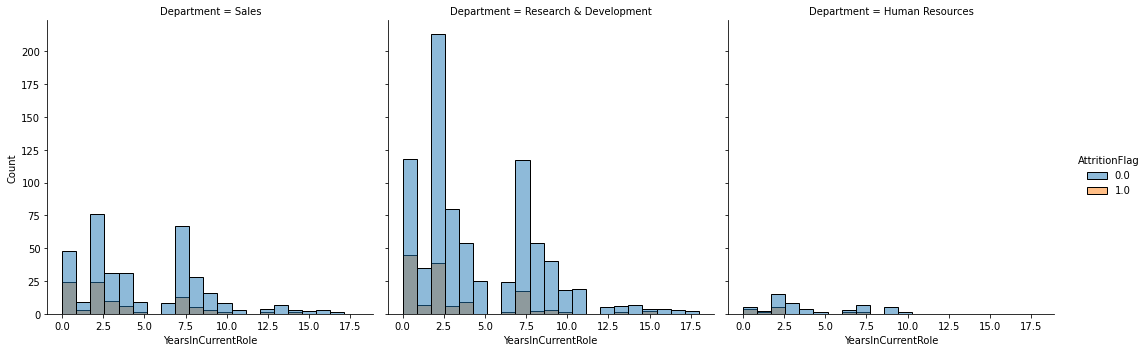

In [113]:
sns.displot(df, x="YearsInCurrentRole", hue="AttritionFlag", col = 'Department', fill=True)

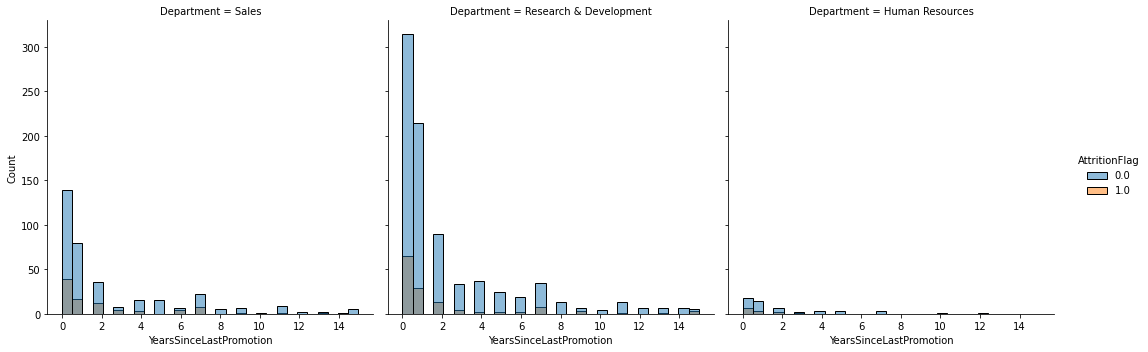

In [114]:
sns.displot(df, x="YearsSinceLastPromotion", hue="AttritionFlag", col = 'Department', fill=True)

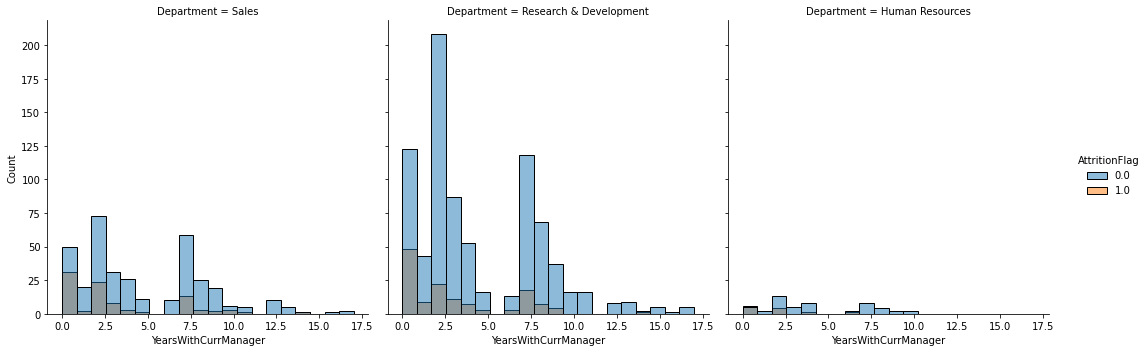

In [115]:
sns.displot(df, x="YearsWithCurrManager", hue="AttritionFlag", col = 'Department', fill=True)

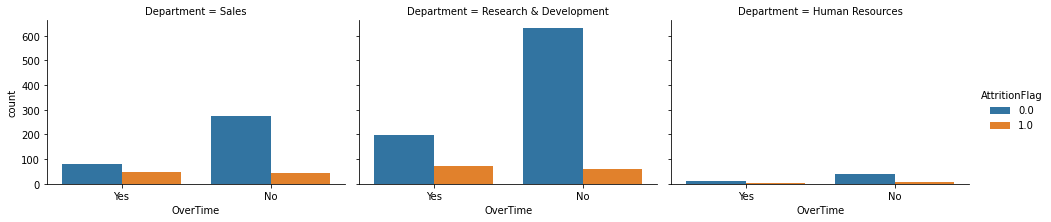

In [121]:
g = sns.catplot(x='OverTime', hue='AttritionFlag', col='Department', data=df, kind='count',height=3, aspect=1.5)

In [119]:
a = pd.DataFrame(df.pivot_table(values=['AttritionFlag','Count'], index = ['Department','OverTime'], aggfunc=np.sum))
a['Attrition%'] = round(a['AttritionFlag']/a['Count'],4)*100
a

AttritionFlag  Count  Attrition%
Department             OverTime                                  
Human Resources        No                  7.0     46       15.22
                       Yes                 5.0     17       29.41
Research & Development No                 59.0    690        8.55
                       Yes                74.0    271       27.31
Sales                  No                 44.0    318       13.84
                       Yes                48.0    128       37.50

In [116]:
df.to_excel('Consolidated Employee Data.xlsx')